In [67]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential

# import PIL
# import PIL.Image
#import tensorflow_datasets as tfds
#import pathlib


In [2]:
#access uploaded dataset directory from google drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#!ls drive/MyDrive/hotdog-nothotdog/
drive_data_dir = 'drive/MyDrive/hotdog-nothotdog/'
train_dir = drive_data_dir+'train'

#test_dir = drive_data_dir+'test' -- this is only useful after we have a model & want to test it on that

In [4]:
print(train_dir)
!ls drive/MyDrive/hotdog-nothotdog/train

drive/MyDrive/hotdog-nothotdog/train
hotdog	nothotdog


In [5]:
#both_types_of_dogs = tf.keras.utils.image_dataset_from_directory(drive_data_dir, labels='inferred')
#type(both_types_of_dogs)
#print("class names: ",both_types_of_dogs.class_names)

In [6]:
# Define your batch size and image size
BATCH_SIZE = 32
IMG_SIZE = (256, 256)

# Create the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

train_classes = train_dataset.class_names

Found 3000 files belonging to 2 classes.
Using 2400 files for training.


In [7]:
#do I trust these 2 sep. func calls not to data-leak via the randomized chunks it's creating for either training or validating?

In [8]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  batch_size=BATCH_SIZE,
  image_size=IMG_SIZE
)

#val_classes = val_dataset.class_names


Found 3000 files belonging to 2 classes.
Using 600 files for validation.


both types of dogs in Training: ['hotdog', 'nothotdog']
here are some examples!



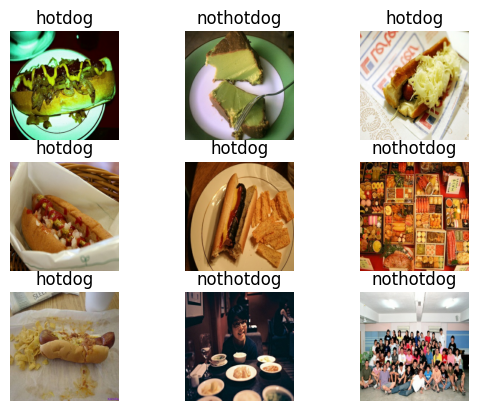

In [9]:
print("both types of dogs in Training:", train_classes)
print("here are some examples!\n")

class_names = train_classes

plt.figsize=(10, 10)
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [10]:
#rename so I can use standard tf & keras tutorial code going forward
#tutorial attrib: https://www.tensorflow.org/tutorials/images/classification
train_ds = train_dataset
val_ds = val_dataset

In [11]:
#de-color the dogs?
#or not? #does this do anything?
#normalization_layer = layers.Rescaling(1./255)


In [12]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # # Notice the pixel values are now in `[0,1]`.
# # print(np.min(first_image), np.max(first_image))

# # #just wanted to show one after rescaling colors(?)
# # #this doesn't work at all, output is a black square
# # #plt.imshow(images[i].numpy().astype("uint8")) #don't use all this like before

# plt.imshow(first_image)
# plt.axis("off")

In [79]:
num_classes = len(class_names)
#es = tf.keras.callbacks.EarlyStopping(patience = 5)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model5 = Sequential([
  layers.Rescaling(1./255, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
#  layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(0.005)),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

In [80]:
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
model5.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_20 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_57 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_58 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 64, 64, 64)      

In [89]:
epochs=33
history = model5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
  #,
  #callbacks = [es]
)


Epoch 1/33
75/75 [==============================] - 12s 132ms/step - loss: 0.1010 - accuracy: 0.9633 - val_loss: 0.2551 - val_accuracy: 0.9183
Epoch 2/33
75/75 [==============================] - 10s 121ms/step - loss: 0.0913 - accuracy: 0.9654 - val_loss: 0.1586 - val_accuracy: 0.9600
Epoch 3/33
75/75 [==============================] - 8s 102ms/step - loss: 0.1023 - accuracy: 0.9617 - val_loss: 0.1653 - val_accuracy: 0.9567
Epoch 4/33
75/75 [==============================] - 10s 121ms/step - loss: 0.0687 - accuracy: 0.9767 - val_loss: 0.2267 - val_accuracy: 0.9383
Epoch 5/33
75/75 [==============================] - 10s 120ms/step - loss: 0.0633 - accuracy: 0.9771 - val_loss: 0.2367 - val_accuracy: 0.9367
Epoch 6/33
75/75 [==============================] - 10s 121ms/step - loss: 0.0755 - accuracy: 0.9733 - val_loss: 0.1898 - val_accuracy: 0.9567
Epoch 7/33
75/75 [==============================] - 9s 112ms/step - loss: 0.0431 - accuracy: 0.9858 - val_loss: 0.2023 - val_accuracy: 0.9533
E

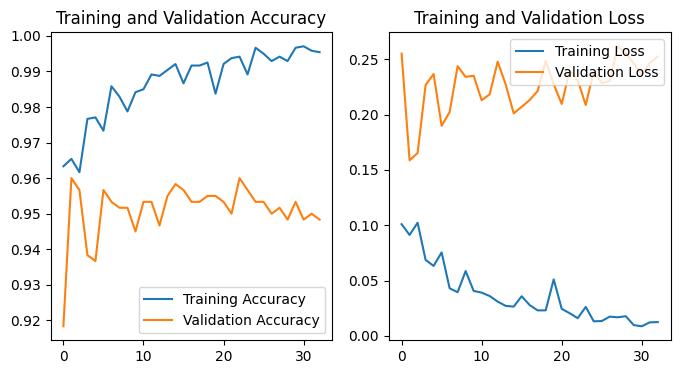

In [94]:
#more pasting from tf tutorial:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("./train_val_acc_loss-dropout50_sig_33.png",dpi =192)


plt.show()

In [93]:
# import pickle
# with open ('DLD_model.pkl', 'wb') as f:
#     pickle.dump(model5, f)

model.save('my_model.h5', save_format='h5')

In [ ]:
#potentially useful template code for preds but ignoring for now

In [85]:
# test_generator = ImageDataGenerator()
# test_data_generator = test_generator.flow_from_directory(
#     test_data_path, # Put your path here
#     target_size=(img_width, img_height),
#     batch_size=32,
#     shuffle=False)
# test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

# predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# # Get most likely class
# predicted_classes = numpy.argmax(predictions, axis=1)

# true_classes = test_data_generator.classes
# class_labels = list(test_data_generator.class_indices.keys())

# report = metrics.confusion_matrix(true_classes, predicted_classes, target_names=class_labels)
# print(report)